In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import datasets

# implement pca bằng numpy

In [10]:
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components

    def fit_transform(self, X):
        X = X - np.mean(X, axis = 0)
        cov_mat = np.cov(X.T)
        
        self.eig_vals , self.eig_vecs = np.linalg.eig(cov_mat)
        
        sorted_idx = np.argsort(self.eig_vals)[::-1]
        sorted_eigvals = self.eig_vals[sorted_idx]
        sorted_eigvecs = self.eig_vecs[:, sorted_idx]
        
        eigvec_subset = sorted_eigvecs[:, 0:self.n_components]
        
        X_reduced = np.dot(eigvec_subset.T, X.T).T
        
        return X_reduced

    def explained_variance(self):
        variance_explained = []
        for i in self.eig_vals:
            variance_explained.append((i/sum(self.eig_vals)))
        return variance_explained


# dùng pca giảm chiều dữ liệu

In [18]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [19]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# visualize dữ liệu

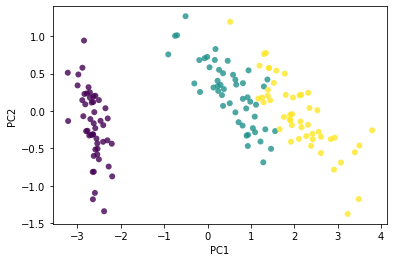

In [12]:
pca = PCA(2)
reduced = pca.fit_transform(X)
plt.scatter(reduced[:, 0], reduced[:, 1], c=y, edgecolor="none", alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')   
plt.show()

Text(0, 0.5, 'cumulative explained variance')

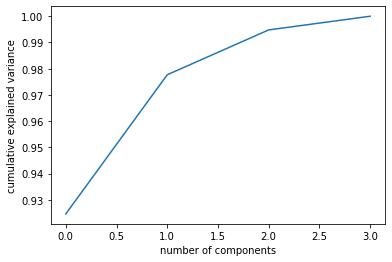

In [13]:
explained_var = pca.explained_variance()
plt.plot(np.cumsum(explained_var))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')